In [ ]:
!pip install category_encoders

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df0 = pd.read_csv('/content/ks_df.csv')
df0.head()

,Unnamed: 0,backers_count,blurb,category,country,country_displayable_name,created_at,creator,currency,deadline,fx_rate,goal,id,launched_at,name,slug,spotlight,staff_pick,state_changed_at,usd_pledged,description_leng,is_successful,is_usa,usd_goal,is_usd,cam_length
0,0,1,This is a project I created to find out why 10...,Video,US,the United States,2017-05-05 22:08:31,"{""id"":220745515,""name"":""Stephanie Balfrey"",""sl...",USD,2017-05-05 22:08:31,1.00000,1000.0,104592348,2017-05-06 00:02:31,Breast Cancer Mission Impossible,breast-cancer-mission-impossible,False,False,2017-07-05 00:02:31,20.000000,123,False,True,1000.000,True,60
1,1,82,Seek & Behold is a full length album paired wi...,Faith,US,the United States,2016-10-26 17:35:56,"{""id"":1889961770,""name"":""Debrianna Grace Cabit...",USD,2016-10-26 17:35:56,1.00000,10000.0,1852641962,2016-11-07 08:00:31,Debrianna Grace Cabitac: Seek & Behold,debrianna-grace-cabitac-seek-and-behold,True,False,2016-12-27 08:00:31,12580.000000,128,True,True,10000.000,True,50
2,2,30,After a lifetime of talking myself out of shar...,Faith,US,the United States,2015-03-18 00:56:52,"{""id"":1600855781,""name"":""Liz Roberson"",""is_reg...",USD,2015-03-18 00:56:52,1.00000,2000.0,64426037,2015-03-18 02:36:59,Liz Roberson Debut Album!,liz-roberson-debut-album,True,False,2015-04-17 02:37:03,2491.000000,133,True,True,2000.000,True,30
3,3,109,The St.Claire is a critical and creative force...,Journalism,US,the United States,2013-05-14 22:38:08,"{""id"":884672734,""name"":""THE ST.CLAIRE"",""is_reg...",USD,2013-05-14 22:38:08,1.00000,8000.0,35349707,2013-05-29 01:10:21,THE ST.CLAIRE | INTO THE FUTURE,the-stclaire-into-the-future,True,False,2013-07-03 01:10:21,8300.000000,132,True,True,8000.000,True,35
4,4,68,Trasformiamo un Bar in un Gamers' Café!!\nBirr...,Restaurants,IT,Italy,2016-11-13 13:47:29,"{""id"":1385445347,""name"":""Emanuele Iannone"",""is...",EUR,2016-11-13 13:47:29,1.12495,6000.0,1306498006,2016-11-21 02:39:42,La Forgia degli Eroi - Gamers Café,la-forgia-degli-eroi-gamers-cafe,True,False,2017-01-07 22:59:00,7914.438485,133,True,False,6749.703,False,47


In [ ]:
df1 = df0[['category', 'staff_pick', 'description_leng', 'usd_goal', 'cam_length', 'is_successful']]
df1.head()

,category,staff_pick,description_leng,usd_goal,cam_length,is_successful
0,Video,False,123,1000.000,60,False
1,Faith,False,128,10000.000,50,True
2,Faith,False,133,2000.000,30,True
3,Journalism,False,132,8000.000,35,True
4,Restaurants,False,133,6749.703,47,True


# "Spotlight" was the leaky feature

In [ ]:
features = [ 'category', 'description_leng', 'usd_goal', 'cam_length']

target = ['is_successful']

In [ ]:
train , test = train_test_split(df1,train_size=0.10,test_size=0.90)

train.shape , test.shape

((20944, 6), (188501, 6))

In [ ]:
x_train = train[features]
y_train = train[target]


x_test = test[features]
y_test = test[target]

In [ ]:
import pickle 

In [ ]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    RandomForestClassifier(random_state=42, n_jobs=-1)
)

pipeline.fit(x_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['category'], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=True, verbose=0)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
              

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = pipeline.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.753051707948499


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get encoded values
encoder = pipeline.named_steps['onehotencoder']
encoded = encoder.transform(x_train)
print ('Print x_train shape after encoding', encoded.shape)

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)


Print x_train shape after encoding (20944, 163)


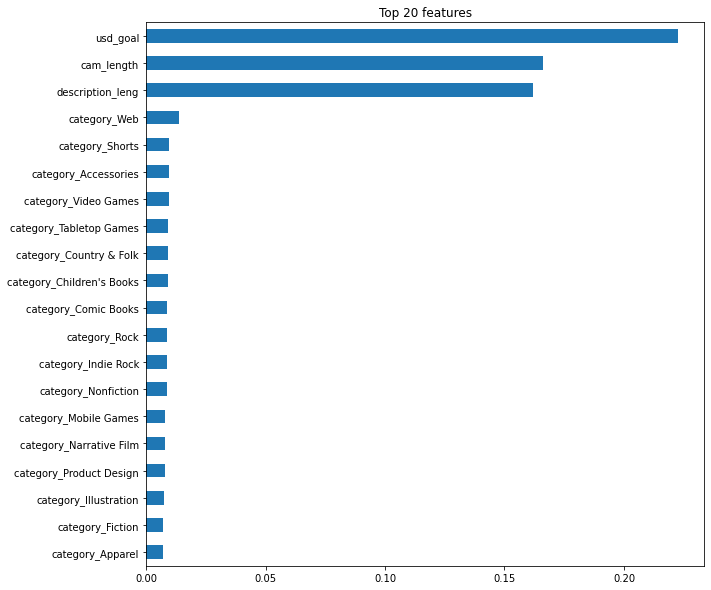

In [ ]:
n = 20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();


In [ ]:
import pickle 

In [ ]:
"""
pickle.dump(pipeline, open("model.p", "wb")) 
from_pickle = pickle.load(open("model.p", "rb"))
"""

'\npickle.dump(pipeline, open("model.p", "wb")) \nfrom_pickle = pickle.load(open("model.p", "rb"))\n'

In [ ]:
df1.category.unique()

array(['Video', 'Faith', 'Journalism', 'Restaurants', 'Hip-Hop', 'Shorts',
       'Indie Rock', 'R&B', 'Food Trucks', 'Printing', 'Music Videos',
       'Plays', 'Comic Books', 'Playing Cards', 'Photo',
       'Camera Equipment', 'Live Games', 'Hardware', 'Classical Music',
       'Drama', 'Apparel', 'Painting', 'DIY', 'Thrillers', 'Places',
       'Literary Journals', 'Science Fiction', 'Web', 'Animation',
       'Farms', 'World Music', 'Music', 'Country & Folk', 'Rock', 'Metal',
       'Technology', 'Musical', 'Gadgets', 'Animals', 'Installations',
       'Knitting', 'Jazz', 'Space Exploration', 'Apps', 'Webseries',
       'Software', 'Interactive Design', 'Sound', 'Residencies',
       'DIY Electronics', 'Pop', 'Wearables', 'Blues', 'Robots',
       'Chiptune', '3D Printing', 'Illustration', 'Woodworking', 'Punk',
       'Graphic Novels', 'Audio', 'Weaving', 'Small Batch', 'Fiction',
       'Movie Theaters', 'Civic Design', 'Comedy', "Children's Books",
       'Bacon', 'Experimental

In [ ]:
print(df1.description_leng.min())
print(df1.description_leng.max())

1
196


In [ ]:
print(df1.usd_goal.min())
print(df1.usd_goal.max())

0.01
125509884.0


In [ ]:
print(df1.cam_length.min())
print(df1.cam_length.max())

0
97


In [ ]:
df_st_true = df0[df0['staff_pick'] == True]
df_st_true.head()

,Unnamed: 0,backers_count,blurb,category,country,country_displayable_name,created_at,creator,currency,deadline,fx_rate,goal,id,launched_at,name,slug,spotlight,staff_pick,state_changed_at,usd_pledged,description_leng,is_successful,is_usa,usd_goal,is_usd,cam_length
11,11,18,Woodcut block printing is simple process but p...,Printing,US,the United States,2014-10-20 04:55:26,"{""id"":1120892008,""name"":""chris Siegrist"",""is_r...",USD,2014-10-20 04:55:26,1.000000,150.0,1388610126,2014-10-21 22:39:47,Hand Printed Christmas Cards from my new studi...,hand-printed-christmas-cards-from-my-new-studi...,True,True,2014-11-10 23:39:47,182.000000,132,True,True,150.000,True,20
15,15,200,Honest Accomplice Theatre produces theatre for...,Plays,US,the United States,2014-12-28 00:15:12,"{""id"":1041359003,""name"":""Honest Accomplice The...",USD,2014-12-28 00:15:12,1.000000,12000.0,1860159809,2015-03-05 21:19:17,Honest Accomplice Theatre 2015-16 Season,honest-accomplice-theatre-2015-16-season,True,True,2015-04-04 20:19:18,12095.000000,61,True,True,12000.000,True,29
21,21,80,"Based on a diary entry written 6 years ago, 'S...",Shorts,US,the United States,2016-01-14 21:18:29,"{""id"":1939246797,""name"":""Sophia Kiapos"",""is_re...",USD,2016-01-14 21:18:29,1.000000,7000.0,412665561,2016-01-22 22:54:59,Sophie (Quai du Louvre),sophie-quai-du-louvre,True,True,2016-02-22 07:11:01,8635.000000,132,True,True,7000.000,True,30
27,27,1649,"Two new records, one solo, one full-band, to b...",Indie Rock,US,the United States,2013-01-01 02:46:24,"{""id"":958123444,""name"":""Kevin Devine"",""is_regi...",USD,2013-01-01 02:46:24,1.000000,50000.0,921469266,2013-01-14 17:02:40,Making LP7 (KD w/ Rob Schnapf) & LP8 (KD+GDB w...,making-lp7-kd-w-rob-schnapf-and-lp8-kd-gdb-w-j...,True,True,2013-02-28 17:02:40,114805.470000,129,True,True,50000.000,True,45
36,36,72,SNOW - In desolate farmland in the midst of wi...,Drama,AU,Australia,2015-12-08 07:57:29,"{""id"":1612841410,""name"":""The Short Film Snow"",...",AUD,2015-12-08 07:57:29,0.686543,15000.0,547129302,2016-01-05 22:42:30,SNOW - A short film by Alex Murawski,snow-a-short-film-by-alex-murawski,True,True,2016-01-25 22:42:31,10853.252615,130,True,False,10298.145,False,20


In [ ]:
df_st_false = df0[df0['staff_pick'] == False]
df_st_false.head()

,Unnamed: 0,backers_count,blurb,category,country,country_displayable_name,created_at,creator,currency,deadline,fx_rate,goal,id,launched_at,name,slug,spotlight,staff_pick,state_changed_at,usd_pledged,description_leng,is_successful,is_usa,usd_goal,is_usd,cam_length
0,0,1,This is a project I created to find out why 10...,Video,US,the United States,2017-05-05 22:08:31,"{""id"":220745515,""name"":""Stephanie Balfrey"",""sl...",USD,2017-05-05 22:08:31,1.00000,1000.0,104592348,2017-05-06 00:02:31,Breast Cancer Mission Impossible,breast-cancer-mission-impossible,False,False,2017-07-05 00:02:31,20.000000,123,False,True,1000.000,True,60
1,1,82,Seek & Behold is a full length album paired wi...,Faith,US,the United States,2016-10-26 17:35:56,"{""id"":1889961770,""name"":""Debrianna Grace Cabit...",USD,2016-10-26 17:35:56,1.00000,10000.0,1852641962,2016-11-07 08:00:31,Debrianna Grace Cabitac: Seek & Behold,debrianna-grace-cabitac-seek-and-behold,True,False,2016-12-27 08:00:31,12580.000000,128,True,True,10000.000,True,50
2,2,30,After a lifetime of talking myself out of shar...,Faith,US,the United States,2015-03-18 00:56:52,"{""id"":1600855781,""name"":""Liz Roberson"",""is_reg...",USD,2015-03-18 00:56:52,1.00000,2000.0,64426037,2015-03-18 02:36:59,Liz Roberson Debut Album!,liz-roberson-debut-album,True,False,2015-04-17 02:37:03,2491.000000,133,True,True,2000.000,True,30
3,3,109,The St.Claire is a critical and creative force...,Journalism,US,the United States,2013-05-14 22:38:08,"{""id"":884672734,""name"":""THE ST.CLAIRE"",""is_reg...",USD,2013-05-14 22:38:08,1.00000,8000.0,35349707,2013-05-29 01:10:21,THE ST.CLAIRE | INTO THE FUTURE,the-stclaire-into-the-future,True,False,2013-07-03 01:10:21,8300.000000,132,True,True,8000.000,True,35
4,4,68,Trasformiamo un Bar in un Gamers' Café!!\nBirr...,Restaurants,IT,Italy,2016-11-13 13:47:29,"{""id"":1385445347,""name"":""Emanuele Iannone"",""is...",EUR,2016-11-13 13:47:29,1.12495,6000.0,1306498006,2016-11-21 02:39:42,La Forgia degli Eroi - Gamers Café,la-forgia-degli-eroi-gamers-cafe,True,False,2017-01-07 22:59:00,7914.438485,133,True,False,6749.703,False,47


In [ ]:
df_st_true.shape, df_st_false.shape

((27494, 26), (181951, 26))

In [ ]:
x_test.shape , x_train.shape

((188501, 4), (20944, 4))

In [ ]:
st_true_success = df_st_true[df_st_true['is_successful'] == True]
st_true_fail = df_st_true[df_st_true['is_successful'] == False]
st_false_success = df_st_false[df_st_false['is_successful'] == True]
st_false_fail = df_st_false[df_st_false['is_successful'] == False]


In [ ]:
# Staff picked and successful
st_true_success.shape[0]

24486

In [ ]:
# Staff picked and failed
st_true_fail.shape[0]

3008

In [ ]:
# Not Staff picked and successful
st_false_success.shape[0]

97165

In [ ]:
# Not Staff picked and failed
st_false_fail.shape[0]

84786

In [ ]:
beggers = df0[df0['usd_goal'] == .01]
beggers.head()

,Unnamed: 0,backers_count,blurb,category,country,country_displayable_name,created_at,creator,currency,deadline,fx_rate,goal,id,launched_at,name,slug,spotlight,staff_pick,state_changed_at,usd_pledged,description_leng,is_successful,is_usa,usd_goal,is_usd,cam_length
34226,34226,6,$1 a square inch in Detroit + super fun excite...,Conceptual Art,US,the United States,2009-11-25 06:07:11,"{""id"":211945026,""name"":""Jerry Paffendorf"",""slu...",USD,2009-11-25 06:07:11,1.0,0.01,620302213,2009-11-25 06:54:49,LOVELAND Round 6: A Force More Powerful,loveland-round-6-a-force-more-powerful,True,False,2009-12-04 06:15:06,100.0,67,True,True,0.01,True,8


In [ ]:
beggers.iloc[0,2]

'$1 a square inch in Detroit + super fun excitement. Inchvest today.'

In [ ]:
poor = df0[df0['usd_goal'] < 1]
poor.head()

,Unnamed: 0,backers_count,blurb,category,country,country_displayable_name,created_at,creator,currency,deadline,fx_rate,goal,id,launched_at,name,slug,spotlight,staff_pick,state_changed_at,usd_pledged,description_leng,is_successful,is_usa,usd_goal,is_usd,cam_length
1500,1500,1,"A true story ー a man abandoned by his parents,...",Drama,JP,Japan,2019-07-20 11:31:52,"{""id"":416251782,""name"":""Masaru Yasokawa"",""slu...",JPY,2019-07-20 11:31:52,0.009358,100.0,48400411,2019-07-23 04:07:52,“SONG FOR THE LOSER” Filmmaking Project,song-for-the-loser-filmmaking-project,True,False,2019-09-21 04:07:52,1.009862,92,True,False,0.935778,False,60
3047,3047,1,"Hi I’m George,I’m a singer songwriter,I have m...",Pop,NZ,New Zealand,2019-09-09 15:46:47,"{""id"":2051028629,""name"":""George"",""is_registere...",NZD,2019-09-09 15:46:47,0.644495,1.0,1332052074,2019-09-13 18:20:10,GS music kpop style singer songwriter,gs-music-kpop-style-singer-songwriter,True,False,2019-11-12 19:20:10,0.913912,135,True,False,0.644495,False,60
4529,4529,1,"A true story ー a man abandoned by his parents,...",Drama,JP,Japan,2019-07-20 11:31:52,"{""id"":416251782,""name"":""Masaru Yasokawa"",""slu...",JPY,2019-07-20 11:31:52,0.009324,100.0,48400411,2019-07-23 04:07:52,“SONG FOR THE LOSER” Filmmaking Project,song-for-the-loser-filmmaking-project,True,False,2019-09-21 04:07:52,1.009862,92,True,False,0.932357,False,60
6866,6866,28,"We will produce Coloring Book, Vinyl Motorcycl...",Comic Books,JP,Japan,2018-05-01 06:08:52,"{""id"":1486348400,""name"":""underpowermotors"",""sl...",JPY,2018-05-01 06:08:52,0.009324,101.0,537781535,2018-05-13 16:10:26,装甲×少女 / Armored x Girl Coloring Book & Sticker,armored-x-girl,True,False,2018-06-12 16:10:26,171.573510,63,True,False,0.941681,False,30
8022,8022,19,Fight as a destined king and restore peace to ...,Video Games,CA,Canada,2017-01-30 15:58:00,"{""id"":1644992020,""name"":""Divine Gaming (delete...",CAD,2017-01-30 15:58:00,0.737199,1.0,248334240,2017-01-31 15:59:36,IRONSAGA,ironsaga-1,True,False,2017-03-03 15:59:37,84.530210,113,True,False,0.737199,False,31


In [ ]:
poor.shape[0]

28

In [ ]:
semi_poor = df0[df0['usd_goal'] < 10]
semi_poor.shape[0]

582

In [ ]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
pipeline2 = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestClassifier(random_state = 0, n_jobs = -1)
)

In [ ]:
param_distributions = {
    'randomforestclassifier__n_estimators': [50, 100, 250, 500], 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None],
    'randomforestclassifier__max_features': [.10,.25,.5,.75,'auto',None]
}

In [ ]:
search = RandomizedSearchCV(
    pipeline2,
    param_distributions = param_distributions,
    n_iter = 10,
    cv = 2,
    verbose = 10,
    return_train_score = True,
    n_jobs = -1
)

search.fit(x_train, y_train);

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.4min finished
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


In [ ]:
x = search.best_estimator_
y_pred2 = x.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred2))

0.7363143962100996


In [ ]:
pipeline3 = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    RandomForestClassifier(random_state = 0, n_jobs = -1)
)

In [ ]:
search3 = RandomizedSearchCV(
    pipeline2,
    param_distributions = param_distributions,
    n_iter = 10,
    cv = 2,
    verbose = 10,
    return_train_score = True,
    n_jobs = -1
)

search3.fit(x_train, y_train);

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   54.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   54.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


In [ ]:
x3 = search.best_estimator_
y_pred3 = x3.predict(x_test)

In [ ]:
print(accuracy_score(y_test,y_pred3))

0.7363143962100996
